In [121]:
from os.path  import join
import random
import matplotlib.pyplot as plt
from minst_datareader import MnistDataloader, show_images
import numpy as np

In [122]:



input_path = 'input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

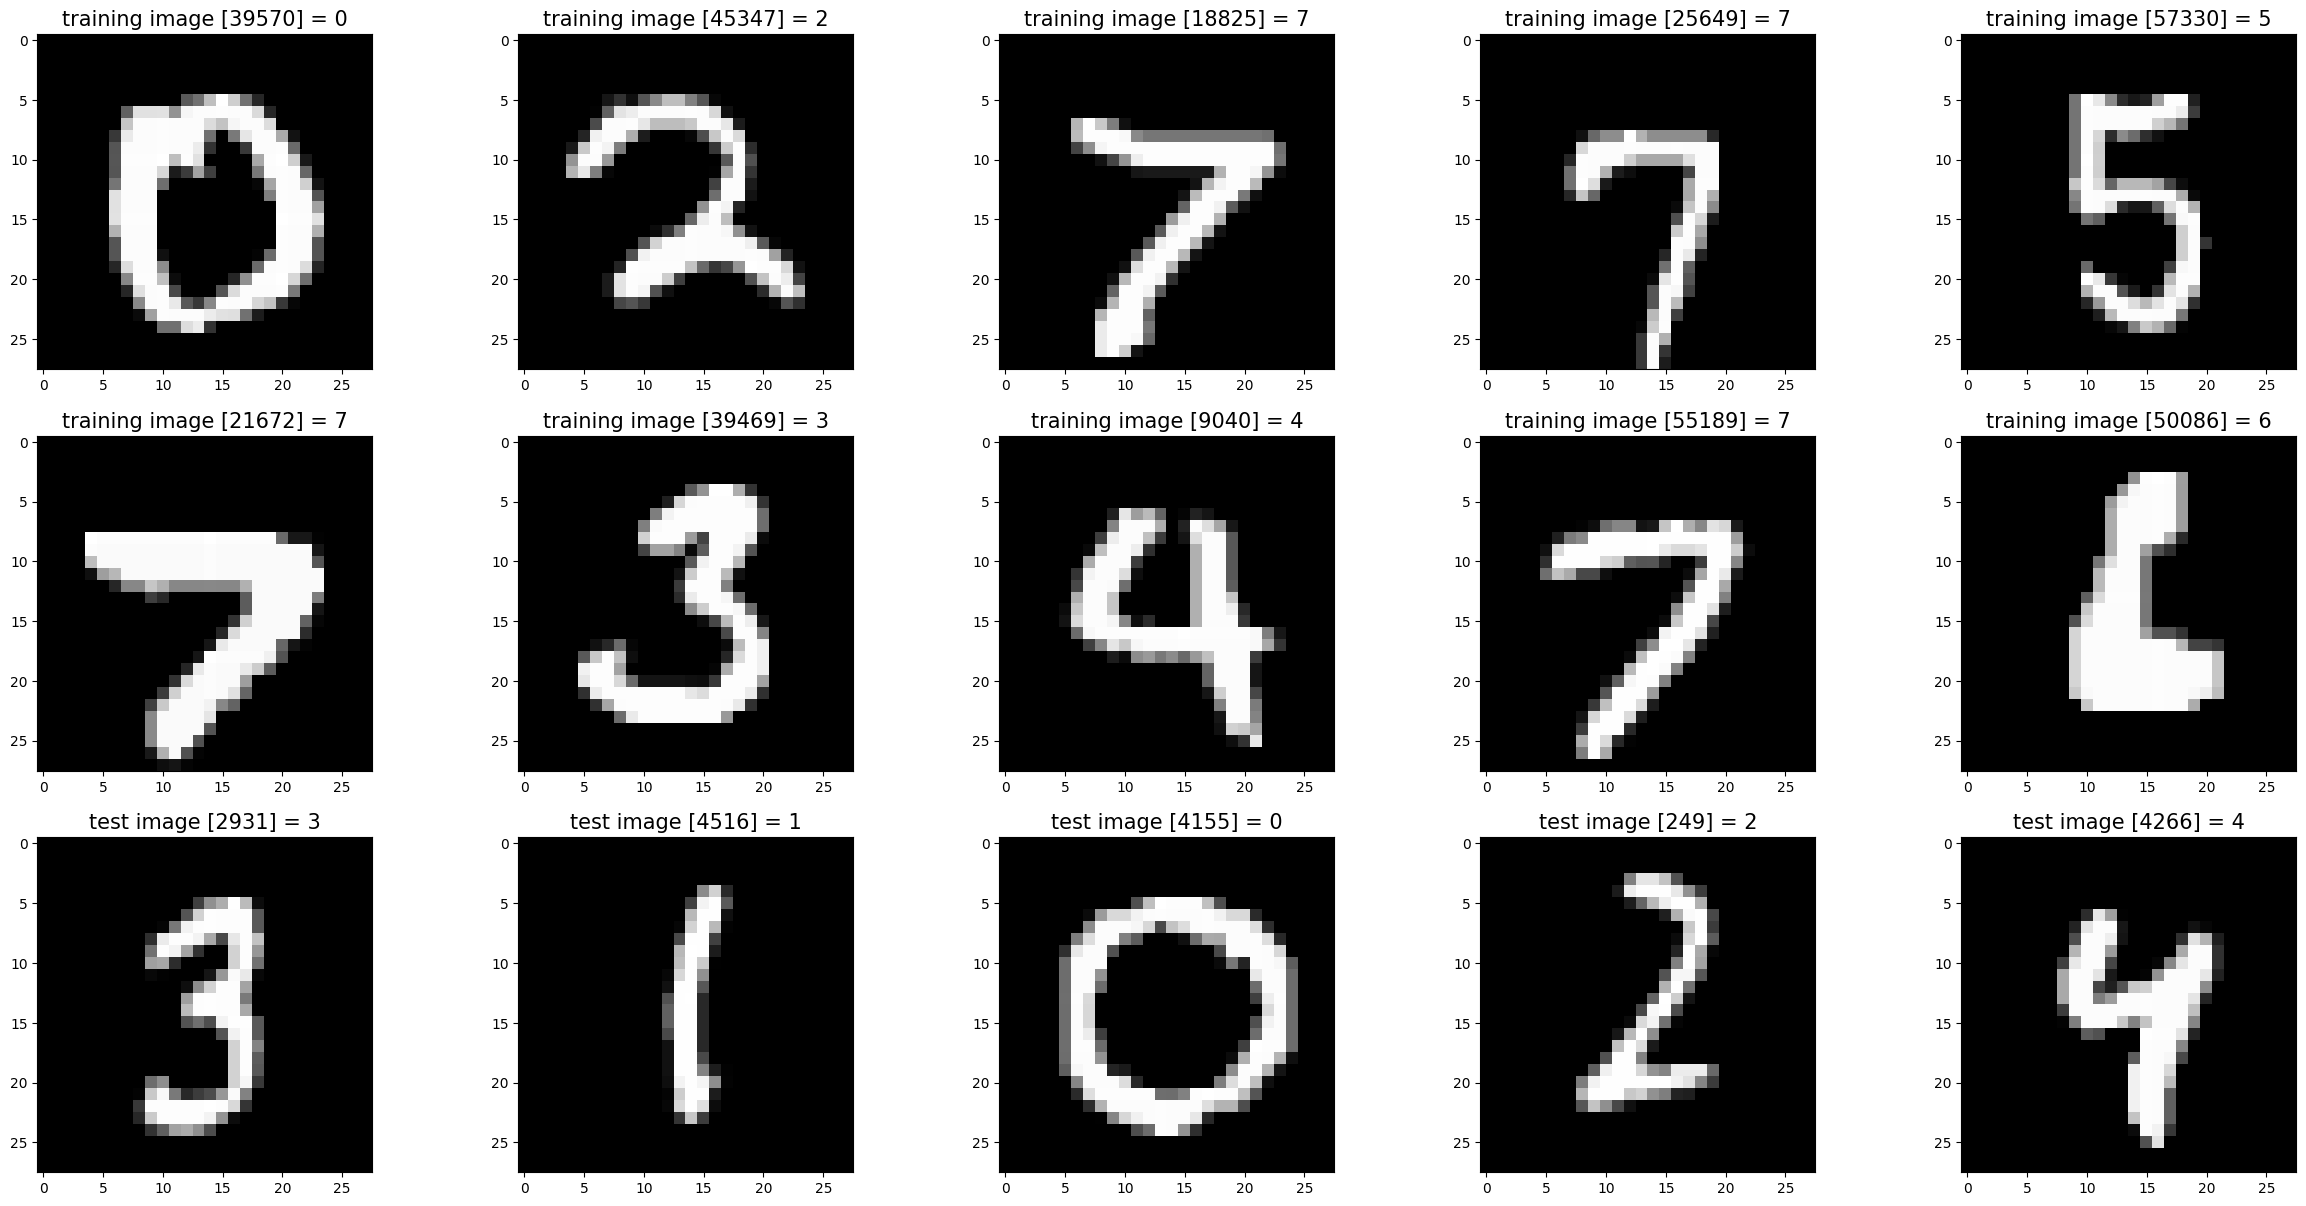

In [123]:

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [124]:

#Shape data, convert to numpy object


x_train = np.array(x_train)
x_test  = np.array(x_test)


x_train = x_train.reshape(len(x_train), 28*28)
x_test  = x_test.reshape(len(x_test), 28*28)

x_train = x_train / 255.0
x_test  = x_test / 255.0


In [125]:
def one_hot(Y):
    Y = Y.astype(int)
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y



Y_oh = one_hot(np.array(y_train))
print(Y_oh.shape)

(10, 60000)


In [126]:
#Iniatlize the weights and biases
def init_parms():
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((10, 1))

    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2


def ReLu(Z):
    return np.maximum(Z, 0)

def derivative_ReLu(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True)) 
    return expZ / np.sum(expZ, axis=0, keepdims=True)


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, A2, W2, X, Y):
    m = Y.shape[0]
    Y_oh = one_hot(Y)

    dZ2 = A2 - Y_oh
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1

    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2

    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)


In [127]:

def gradient_descent(X, Y, iterations, alpha):
    X = np.array(X)
    Y = np.array(Y)

    W1, b1, W2, b2 = init_parms()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if(i %50 == 0):
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {i} | Accuracy: {acc:.4f}")
            
    return W1, b1, W2, b2

In [128]:
W1, b1, W2, b2 = gradient_descent(x_train.T, y_train, 10000, 0.01)    

Iteration 0 | Accuracy: 0.1016
Iteration 50 | Accuracy: 0.3065
Iteration 100 | Accuracy: 0.4509
Iteration 150 | Accuracy: 0.5497
Iteration 200 | Accuracy: 0.6135
Iteration 250 | Accuracy: 0.6539
Iteration 300 | Accuracy: 0.6850
Iteration 350 | Accuracy: 0.7123
Iteration 400 | Accuracy: 0.7353
Iteration 450 | Accuracy: 0.7543
Iteration 500 | Accuracy: 0.7712
Iteration 550 | Accuracy: 0.7848
Iteration 600 | Accuracy: 0.7973
Iteration 650 | Accuracy: 0.8067
Iteration 700 | Accuracy: 0.8161
Iteration 750 | Accuracy: 0.8235
Iteration 800 | Accuracy: 0.8300
Iteration 850 | Accuracy: 0.8358
Iteration 900 | Accuracy: 0.8403
Iteration 950 | Accuracy: 0.8445
Iteration 1000 | Accuracy: 0.8484
Iteration 1050 | Accuracy: 0.8519
Iteration 1100 | Accuracy: 0.8551
Iteration 1150 | Accuracy: 0.8582
Iteration 1200 | Accuracy: 0.8609
Iteration 1250 | Accuracy: 0.8633
Iteration 1300 | Accuracy: 0.8652
Iteration 1350 | Accuracy: 0.8676
Iteration 1400 | Accuracy: 0.8696
Iteration 1450 | Accuracy: 0.8713
Ite

In [129]:

Z1_test, A1_test, Z2_test, A2_test = forward_prop(W1, b1, W2, b2, x_test.T)

# Predictions
test_preds = get_predictions(A2_test)

# Accuracy
test_acc = get_accuracy(test_preds, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9194


Number of misclassified examples: 806


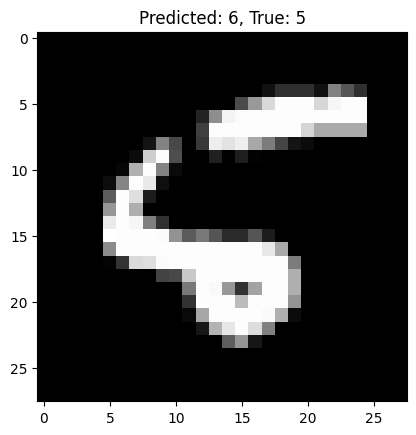

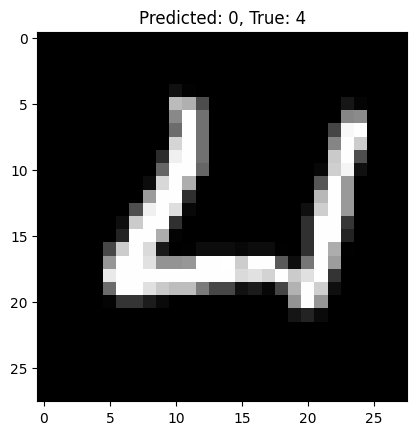

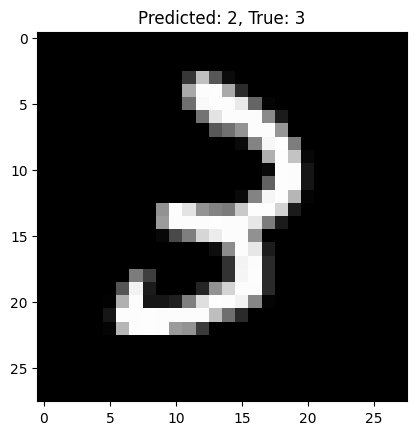

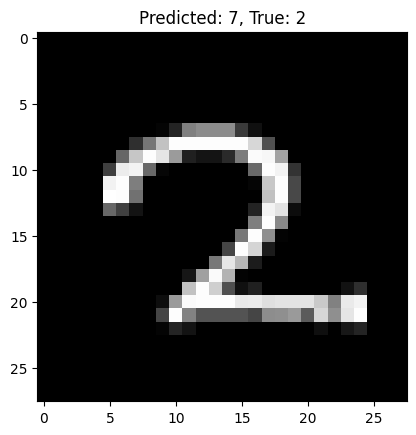

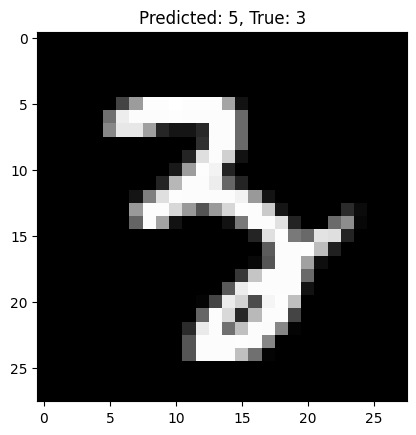

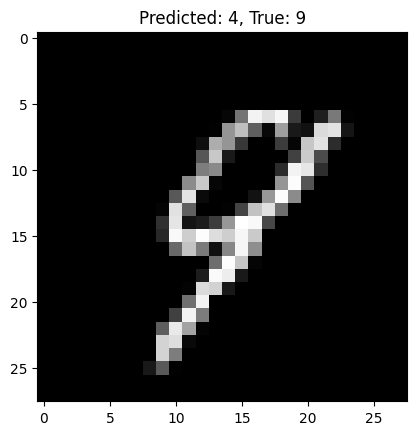

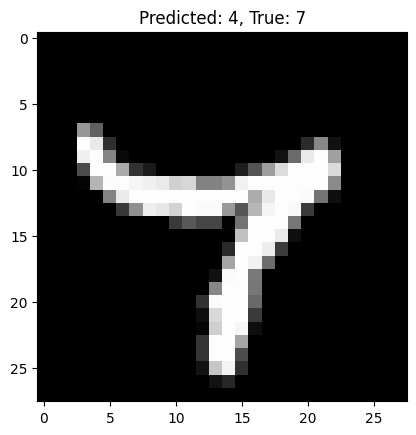

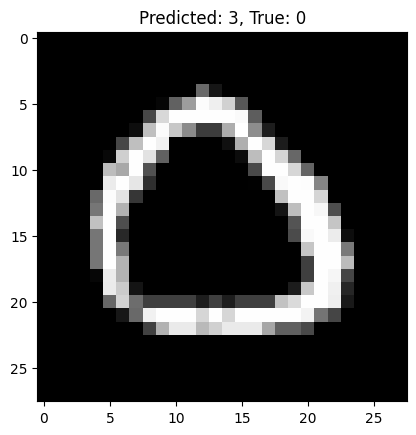

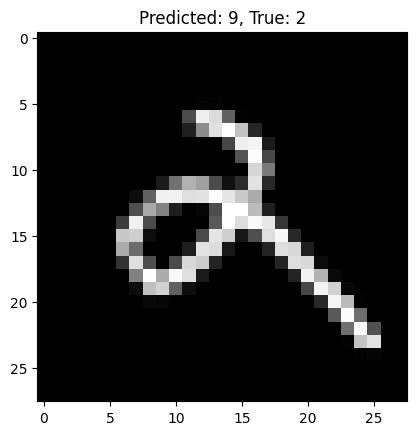

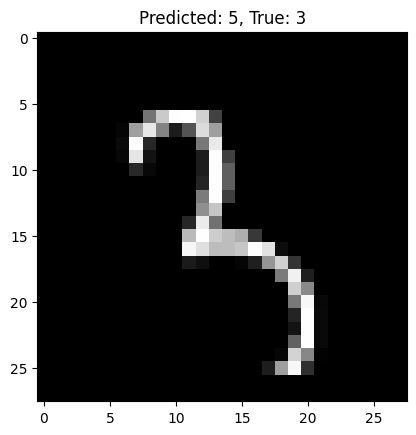

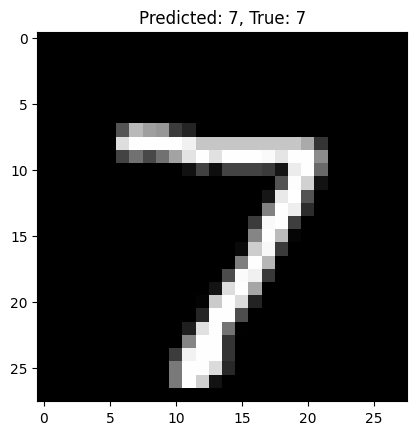

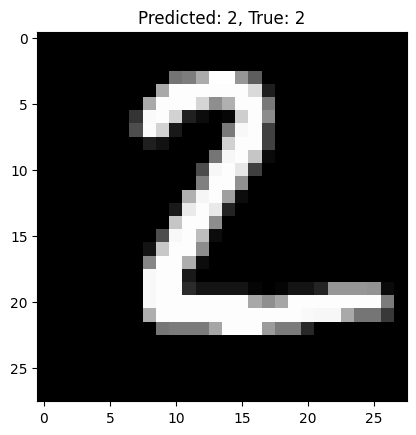

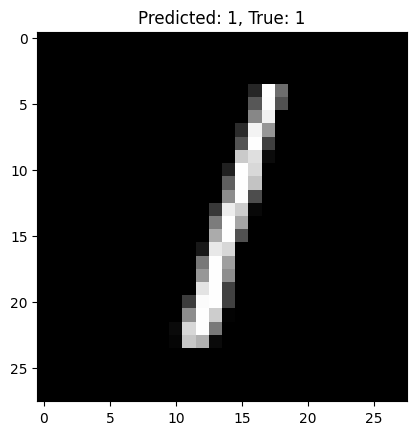

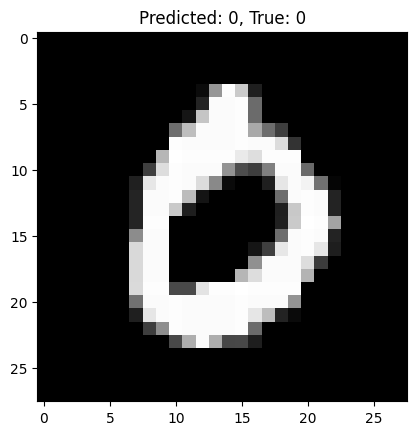

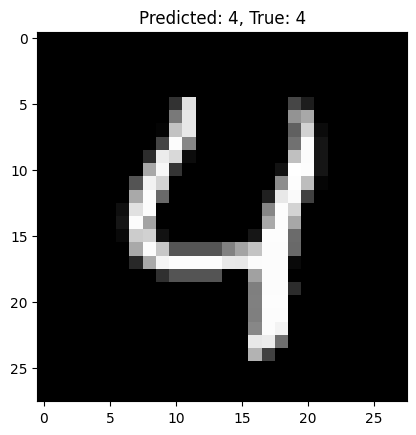

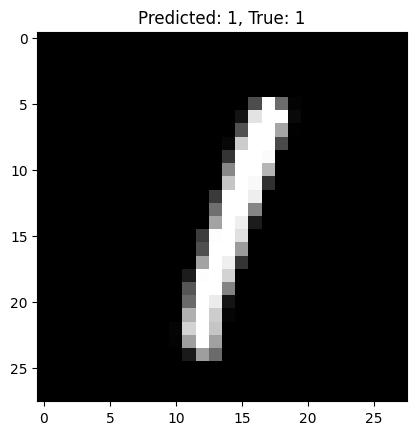

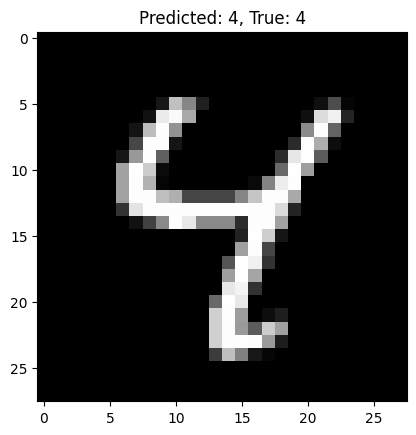

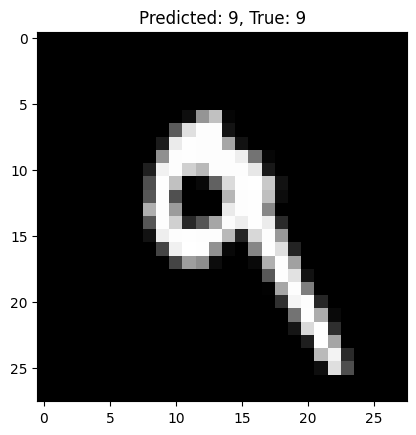

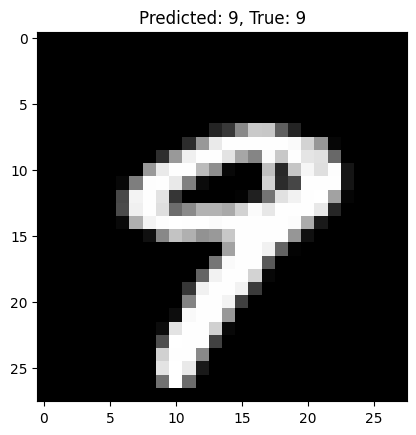

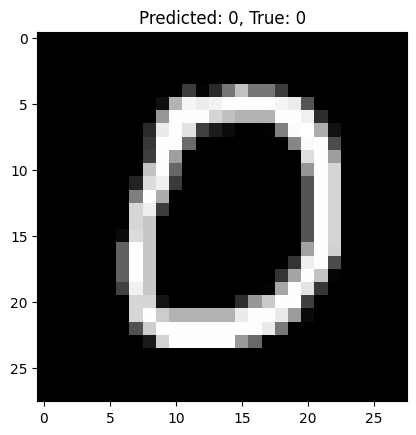

In [131]:
wrong_indices = np.where(test_preds != y_test)[0]
right_indiices = np.where(test_preds == y_test)[0]
print(f"Number of misclassified examples: {len(wrong_indices)}")
for i in wrong_indices[:10]:
    img = x_test[i].reshape(28, 28)  # reshape flat vector to 28x28
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {test_preds[i]}, True: {y_test[i]}")
    plt.show()
    
for i in right_indiices[:10]:
    img = x_test[i].reshape(28, 28)  # reshape flat vector to 28x28
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {test_preds[i]}, True: {y_test[i]}")
    plt.show()